# Requirements

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from scipy.stats import pearsonr

import nltk

import sddk

# PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import geoplot as gplt

In [123]:
# setup sciencedata, google and figures exports
# (feel free to skip...)

s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")
figpath = "SDAM_data/social_diversity/socdiv_figures/"

# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".eps", format="eps")
    fig.savefig("../figures/" + fig_name + ".png")
    s.write_file(figpath + fig_name + ".eps", fig)
    s.write_file(figpath + fig_name + ".png", fig)

# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict")
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
socdiv_results = gc.open_by_url("https://docs.google.com/spreadsheets/d/1kACGBS9Xdno7FL2fPZ-vCOu4SSh9uUaZmGvnEghVs_A/edit?usp=sharing")

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [4]:
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict")
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
socdiv_results = gc.open_by_url("https://docs.google.com/spreadsheets/d/1kACGBS9Xdno7FL2fPZ-vCOu4SSh9uUaZmGvnEghVs_A/edit?usp=sharing")

# Import datasets

In [5]:
LIRE = gpd.read_parquet("../data/large_data/LIRE_occupsorgs_cats.parquet")

In [6]:
LIRE[LIRE["is_western"]]

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
210,EDCS-21300235,"CIL 06, 00882 (p 3777, 4302, 4367) = CIL 06, 3...",Aegyptus,Aegyptus,Al Iskandariyah / Alexandria,"['Al Iskandariyah', 'Alexandria']",20,,"['Augusti/Augustae', 'tituli sacri', 'viri']",tituli sacri,...,9998.65,1002,"[12.395451, 42.021684]",15756.86,large,[faber],1,[],0,"[Production and related workers, transport equ..."
281,EDCS-12800362,"AE 1964, 00222",Aemilia / Regio VIII,Aemilia / Regio VIII,Bagno di Romagna,Bagno di Romagna,200,,"['tituli sacri', 'viri']",tituli sacri,...,41767.45,937,"[11.903398, 43.983123]",17068.12,rural,[],0,[],0,[]
282,EDCS-09300206,"AE 1976, 00204",Aemilia / Regio VIII,Aemilia / Regio VIII,Bologna / Bononia,"['Bologna', 'Bononia']",50,,"['mulieres', 'tituli sepulcrales', 'tria nomin...",tituli sepulcrales,...,330.60,1012,"[11.470525, 44.443585]",11359.10,medium,[],0,[],0,[]
283,EDCS-09300210,"AE 1976, 00208",Aemilia / Regio VIII,Aemilia / Regio VIII,Bologna / Bononia,"['Bologna', 'Bononia']",50,,"['liberti/libertae', 'mulieres', 'tituli sepul...",tituli sepulcrales,...,330.60,1012,"[11.470525, 44.443585]",11359.10,medium,[],0,[],0,[]
284,EDCS-09300215,"AE 1976, 00213",Aemilia / Regio VIII,Aemilia / Regio VIII,Bologna / Bononia,"['Bologna', 'Bononia']",100,,"['mulieres', 'tituli sepulcrales', 'tria nomin...",tituli sepulcrales,...,330.60,1012,"[11.470525, 44.443585]",11359.10,medium,[],0,[],0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136185,EDCS-10700071,"SupIt-12-IC, 00047 = IulCarnicum-02, 00125",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",200,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]
136186,EDCS-10700072,"SupIt-12-IC, 00048 = IulCarnicum-02, 00137",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",200,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]
136187,EDCS-10700073,"SupIt-12-IC, 00049 = IulCarnicum-02, 00134",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",200,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]
136188,EDCS-10700074,"SupIt-12-IC, 00050 = IulCarnicum-02, 00115",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",25,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]


In [7]:
LIRE.head(5)

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
0,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"['Agios Athanasios', 'Photike']",313,,"['Augusti/Augustae', 'litterae erasae', 'ordo ...",tituli honorarii,...,37687.28,31,"[20.787767, 39.546432]",10725.84,rural,[],0,[],0,[]
1,EDCS-03300852,"AE 1995, 01409",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",276,to 276; b: 276 to 282 \n\n,"['Augusti/Augustae', 'miliaria', 'viri']",miliaria,...,23430.85,73,"[22.336587, 37.462155]",7876.09,large,[],0,[],0,[]
2,EDCS-28500283,"CIL 03, 07251 = D 00214 = NDIEC-07, p 81 = AE ...",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",50,,"['Augusti/Augustae', 'leges', 'viri']",leges,...,23430.85,73,"[22.336587, 37.462155]",7876.09,large,[],0,[],0,[]
3,EDCS-09400671,"CIMRM-02, 02350 = IG-12, 00274 = Andros 00124 ...",Achaia,Achaia,Andros,Andros,209,,"['litterae erasae', 'tituli sacri']",tituli sacri,...,60414.04,47,"[24.34625, 37.633122]",47547.59,rural,[],0,[],0,[]
4,EDCS-24600769,"AE 1995, 01407 = AE 2001, 01812",Achaia,Achaia,Archea Olimpia / Archaia Olympia / Olympia,"['Archea Olimpia', 'Archaia Olympia', 'Olympia']",96,,{ },{ },...,45272.69,35,"[21.435443, 37.827452]",26125.55,large,[],0,[],0,[]


In [8]:
# mask
before235 = LIRE["not_before"] < 235

In [9]:
len(LIRE[before235])

114898

In [10]:
LIRE[before235]["occups_N"].sum()

4751

In [11]:
LIRE[before235]["occups_N"].sum() / LIRE["occups_N"].sum()

0.9168274797375531

In [53]:
roman_cities = gpd.read_file("../data/roman_cities_pop.geojson")
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson")
pleiades_regions_west = gpd.read_file("../data/pleiades_regions_west.geojson")

# Map inscriptions on cities

In [54]:
def get_my_city(row):
    context = row["urban_context_alt"]
    try:
        ID = row[context + "_city_ID"]
    except:
        ID = None
    return ID
LIRE["city_ID"] = LIRE.apply(lambda row: get_my_city(row), axis=1)

In [55]:
def get_inscriptions(ID):
    city_dict = {}
    city_data = LIRE[LIRE["city_ID"]==str(ID)]
    city_data_pre235 = LIRE[(LIRE["city_ID"]==str(ID)) & (before235)]
    if len(city_data) > 0:
        # all inscriptions
        city_dict["inscr_N_all"] = len(city_data)
        city_dict["occups_list_all"] = [el for sublist in city_data["occups"] for el in sublist]
        city_dict["occups_N_all"] = city_data["occups_N"].sum()

        # inscriptions pre 235
        city_dict["inscr_N"] = len(city_data_pre235)
        city_dict["occups_list"] = [el for sublist in city_data_pre235["occups"] for el in sublist]
        city_dict["occups_N"] = city_data_pre235["occups_N"].sum()
        city_dict["inscr_N_ratio"] = len(city_data_pre235) / len(city_data)
    return city_dict

cities_dict_data = roman_cities["ID"].apply(get_inscriptions)

In [56]:
cities_inscr_data = pd.DataFrame(cities_dict_data.tolist())
cities_inscr_data.head(5)

,inscr_N_all,occups_list_all,occups_N_all,inscr_N,occups_list,occups_N,inscr_N_ratio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,[],0.0,1.0,[],0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
roman_cities = pd.concat([roman_cities, cities_inscr_data], axis=1)

In [58]:
del cities_inscr_data
del cities_dict_data

# Explore inscriptions within cities

In [59]:
roman_cities.head(5)

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,pop_diff,western_province,geometry,inscr_N_all,occups_list_all,occups_N_all,inscr_N,occups_list,occups_N,inscr_N_ratio
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...,...,NaN,False,POINT (22.93333 38.58333),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,BNP; DGRG; PECS; Sear 2006.,...,NaN,False,POINT (23.73409 38.08347),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...,...,NaN,False,POINT (23.21970 38.45261),1.0,[],0.0,1.0,[],0.0,1.0
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,2,59 A3,-600,NaN,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...,...,NaN,False,POINT (23.42850 37.75007),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,3,58 C1,-600,NaN,DGRG; Hansen and Nielsen 2004.,...,NaN,False,POINT (22.35572 38.14795),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# all cities
len(roman_cities)

1388

In [61]:
roman_cities["inscr_N"].sum()

90177.0

In [62]:
# cities with at least one inscription
(roman_cities["inscr_N"]>0).sum()

822

In [63]:
# proportion of cities with at least one inscription
(roman_cities["inscr_N"]>0).mean()

0.5922190201729106

In [64]:
# N western cities
(roman_cities["western_province"]).sum()

889

In [65]:
((roman_cities["western_province"]) & (roman_cities["inscr_N"]>0)).sum()

642

In [66]:
((roman_cities["western_province"]) & (roman_cities["inscr_N"]>0)).sum() / (roman_cities["western_province"]).sum()

0.7221597300337458

# Focus on western cities alone - basic explorations (feel free to skip)

In [67]:
roman_cities = roman_cities[roman_cities["western_province"]]
len(roman_cities)

889

In [68]:
roman_cities["pop_est_log"] = np.log(roman_cities["pop_est"])
roman_cities["inscr_N_log"] = np.log(roman_cities["inscr_N"])

roman_cities["pop_est_log10"] = np.log10(roman_cities["pop_est"])
roman_cities["inscr_N_log2"] = np.log2(roman_cities["inscr_N"])

roman_cities["occups_N_log"] = np.log2(roman_cities["occups_N"])


/Users/kasev/Projects/social_diversity/socdiv_venv/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kasev/Projects/social_diversity/socdiv_venv/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Measuring Specialization and Diversity

In [69]:
len(roman_cities)

889

In [70]:
(roman_cities["occups_N"]>0).sum()

302

In [71]:
roman_cities["occups_N"].max()

1663.0

In [72]:
# roman cities western with at least one occupations
roman_cities_wo = roman_cities[roman_cities["occups_N"]>0].copy()

In [73]:
roman_cities_wo

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,occups_N_all,inscr_N,occups_list,occups_N,inscr_N_ratio,pop_est_log,inscr_N_log,pop_est_log10,inscr_N_log2,occups_N_log
165,Hanson2016_166,Avitta,Henchir Bou Ftis,Africa Proconsularis,Tunisia,3,32 E4,-50,NaN,BNP; Boatwright 2000; Lepelley 1979-1981; Russ...,...,5.0,37.0,"[scaenicus, tonsor, possessor, faber]",4.0,0.822222,8.905987,3.610918,3.867821,5.209453,2.000000
171,Hanson2016_172,Carthago,Tunis,Africa Proconsularis,Tunisia,1,32 F3,-49,NaN,Bomgardner 2000; Brunt 1971; Cornell and Mathe...,...,9.0,435.0,"[curator, mesor, curator, mensor, agrimensor, ...",9.0,0.917722,11.533453,6.075346,5.008915,8.764872,3.169925
177,Hanson2016_178,Hadrumetum,Sousse,Africa Proconsularis,Tunisia,3,33 G1,-150,NaN,BNP; Brunt 1971; DGRG; Lepelley 1979-1981; Mac...,...,2.0,9.0,"[faber, faber]",2.0,0.692308,10.480803,2.197225,4.551755,3.169925,1.000000
179,Hanson2016_180,Lepcis Magna,Lebda,Africa Proconsularis,Libya,1,35 G2,-30,NaN,Bomgardner 2000; Golvin 1988; Humphrey 1986; L...,...,15.0,245.0,"[marmorarius, ornatrix, marmorarius, ornator, ...",10.0,0.772871,11.942901,5.501258,5.186736,7.936638,3.321928
181,Hanson2016_182,Limisa,Ksar Lemsa,Africa Proconsularis,Tunisia,3,32 E4,100,NaN,PECS; Quinn and Wilson 2013; Sear 2006.,...,1.0,12.0,[conditor],1.0,1.000000,6.907755,2.484907,3.000000,3.584963,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Hanson2016_1298,Catania,Catania,Sicilia,Italy,3,47 G3,-729,NaN,Benario 1981; Brunt 1971; Cornell and Mathews ...,...,1.0,107.0,[faber],1.0,0.891667,10.247432,4.672829,4.450403,6.741467,0.000000
1311,Hanson2016_1312,Messana,Messina,Sicilia,Italy,3,47 H2,-730,NaN,Brunt 1971; Cornell and Mathews 1982; Hansen 2...,...,1.0,5.0,[faber],1.0,0.833333,9.351579,1.609438,4.061339,2.321928,0.000000
1315,Hanson2016_1316,Panormus,Palermo,Sicilia,Italy,2,47 C2,-700,NaN,Beloch 1886; BNP; Brunt 1971; Cornell and Math...,...,2.0,23.0,"[curator, curator]",2.0,0.793103,8.521584,3.135494,3.700877,4.523562,1.000000
1317,Hanson2016_1318,Segesta,Segesta,Sicilia,Italy,3,47 B3,-600,NaN,McEvedy 2011; PECS; Sear 2006; Woloch 1983.,...,1.0,28.0,[forensis],1.0,1.000000,8.405367,3.332205,3.650405,4.807355,0.000000


In [74]:
# generate a dictionary of occupations by type
occupations_df = pd.read_csv("../data/occupations_list_hisco.csv")
occups_cats_dict = dict(zip(occupations_df["Term"], occupations_df["Harris_Category"]))

In [75]:
print(len(set(occups_cats_dict.values())))
set(occups_cats_dict.values())

19


{'Building',
 'Clothing',
 'Death-care sector',
 'Education',
 'Finance',
 'Food-Production',
 'Food-Retail',
 'Fuel / Raw material',
 'Glass-Working',
 'Household Goods',
 'Managerial',
 'Metal-Working',
 'Miscellaneous Services',
 'Performing Arts',
 'Plastic Arts',
 'Retail',
 'Transport',
 'Unclear meaning',
 'Water-Management'}

In [76]:
occups_cats_labels = list(set(occups_cats_dict.values()))
occups_cats_labels

['Food-Production',
 'Glass-Working',
 'Plastic Arts',
 'Retail',
 'Building',
 'Food-Retail',
 'Water-Management',
 'Performing Arts',
 'Household Goods',
 'Managerial',
 'Fuel / Raw material',
 'Miscellaneous Services',
 'Metal-Working',
 'Death-care sector',
 'Clothing',
 'Education',
 'Transport',
 'Unclear meaning',
 'Finance']

In [77]:
def cat_for_occup(list_of_occups):
    try:
        return [occups_cats_dict[occup] for occup in list_of_occups]
    except:
        return []
roman_cities_wo["occups_cats_list"] = roman_cities_wo["occups_list"].apply(cat_for_occup)

In [78]:
roman_cities_wo["occups_cats_unique_N"] = roman_cities_wo["occups_cats_list"].apply(lambda x: len(set(x)))
roman_cities_wo["occups_cats_unique_N"]

165     4
171     3
177     1
179     3
181     1
       ..
1297    1
1311    1
1315    1
1317    1
1321    1
Name: occups_cats_unique_N, Length: 302, dtype: int64

Text(0, 0.5, 'N cities')

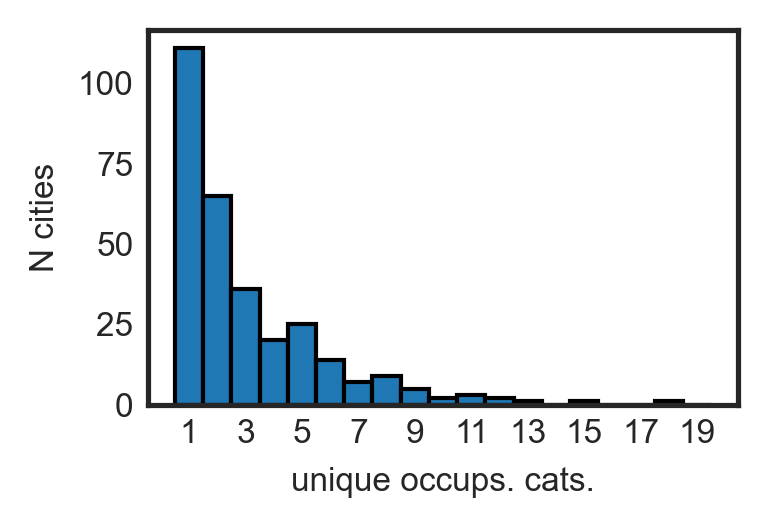

In [83]:
fig, ax = plt.subplots(figsize=(2.6, 1.8), tight_layout=True)
bins = [n+0.5 for n in range(0,20)]
roman_cities_wo["occups_cats_unique_N"].hist(ax=ax, edgecolor="black", bins=bins)
ax.set_xticks(range(1,20, 2))
ax.grid(False)
ax.set_xlabel("unique occups. cats.")
ax.set_ylabel("N cities")

In [36]:
save_figure(fig, "unique_cats_per_cities_hist")

NameError: name 'save_figure' is not defined

In [84]:
roman_cities_wo["occups_cats_list"]

165     [Performing Arts, Miscellaneous Services, Mana...
171     [Managerial, Miscellaneous Services, Manageria...
177                        [Metal-Working, Metal-Working]
179     [Building, Miscellaneous Services, Building, M...
181                                     [Food-Production]
                              ...                        
1297                                      [Metal-Working]
1311                                      [Metal-Working]
1315                             [Managerial, Managerial]
1317                                         [Managerial]
1321                             [Managerial, Managerial]
Name: occups_cats_list, Length: 302, dtype: object

# Specialization

In [85]:
def get_cat_row_vec(cat_list):
    cat_row_vec = []
    for cat in occups_cats_labels:
        cat_row_vec.append(cat_list.count(cat))
    return np.array(cat_row_vec)

In [86]:
roman_cities_wo["occups_cats_vec"] = roman_cities_wo["occups_cats_list"].apply(get_cat_row_vec)
roman_cities_wo["occups_cats_vec"]

165     [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, ...
171     [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 1, 0, 0, ...
177     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...
179     [0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, ...
181     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
1297    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
1311    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
1315    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...
1317    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
1321    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...
Name: occups_cats_vec, Length: 302, dtype: object

In [87]:
def occups_cats_vec_weighted(occups_cat_vec):
    a = np.array(occups_cat_vec, dtype=float)
    a = a / sum(a)
    return a
roman_cities_wo["shares_vec"] = roman_cities_wo["occups_cats_vec"].apply(occups_cats_vec_weighted)
roman_cities_wo["shares_vec"]

165     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0,...
171     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
177     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
179     [0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, ...
181     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1297    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1311    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1315    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1317    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1321    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: shares_vec, Length: 302, dtype: object

In [88]:
roman_cities_wo["ZI"] = roman_cities_wo["shares_vec"].apply(max)
roman_cities_wo["ZI"]

165     0.250000
171     0.666667
177     1.000000
179     0.600000
181     1.000000
          ...   
1297    1.000000
1311    1.000000
1315    1.000000
1317    1.000000
1321    1.000000
Name: ZI, Length: 302, dtype: float64

In [89]:
roman_cities_wo["ZI_cat"] = roman_cities_wo["shares_vec"].apply(lambda x: occups_cats_labels[np.argmax(x)])

In [90]:
roman_cities_wo.sort_values("ZI", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N","occups_cats_vec", "ZI", "ZI_cat"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI,ZI_cat
889,Iuvanum,41.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,Miscellaneous Services
890,Larinum,9.0,2.0,1,"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,Performing Arts
853,Cosilinum,52.0,3.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, ...",1.000000,Managerial
855,Grumentum,13.0,2.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",1.000000,Managerial
862,Potentia (Italia (III Lucania et Brutii)),17.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1.000000,Managerial
...,...,...,...,...,...,...,...
1268,Brigetio,403.0,16.0,9,"[1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 3, ...",0.187500,Miscellaneous Services
789,Pompeii,3286.0,56.0,11,"[3, 0, 2, 7, 3, 0, 0, 9, 0, 9, 0, 10, 7, 0, 3,...",0.178571,Miscellaneous Services
1271,Mursa,99.0,6.0,6,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...",0.166667,Food-Production
785,Norba,102.0,12.0,8,"[2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, ...",0.166667,Food-Production


In [91]:
roman_cities_wo["ZIw"] = roman_cities_wo.apply(lambda row: row["ZI"] * row["occups_N_log"], axis=1)
roman_cities_wo.sort_values("ZIw", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "ZI", "ZIw", "ZI_cat"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI,ZIw,ZI_cat
1287,Augusta Vindelicum,201.0,10.0,2,"[1, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.900000,2.989735,Retail
873,Alba Fucentia,77.0,12.0,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 10, 0, 0, 1, 0, 0,...",0.833333,2.987469,Managerial
1058,Patavium,164.0,17.0,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 12, 0, 0,...",0.705882,2.885268,Metal-Working
991,Roma,25841.0,1663.0,18,"[119, 6, 25, 99, 105, 24, 8, 47, 18, 423, 1, 2...",0.254360,2.721539,Managerial
332,Carmo,28.0,11.0,4,"[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 8, 0, 0, 0, ...",0.727273,2.515950,Miscellaneous Services
...,...,...,...,...,...,...,...,...
583,Beda,44.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,0.000000,Miscellaneous Services
605,Cabillonum,27.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,0.000000,Miscellaneous Services
631,Aquae Sextiae,24.0,1.0,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Building
649,Mauves,2.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Transport


In [92]:
# Total shares
all_occups_N = roman_cities_wo["occups_N"].sum()
index_label_sum_dict = {}
for i, cat in zip(range(len(occups_cats_labels)), occups_cats_labels):
    cat_sum = sum(roman_cities_wo["occups_cats_vec"].apply(lambda vec: vec[i]))
    cat_share = cat_sum / all_occups_N
    index_label_sum_dict[i] = [cat, cat_sum, cat_share]
index_label_sum_dict

{0: ['Food-Production', 193, 0.0477368290873114],
 1: ['Glass-Working', 8, 0.001978728666831561],
 2: ['Plastic Arts', 45, 0.011130348750927528],
 3: ['Retail', 284, 0.0702448676725204],
 4: ['Building', 258, 0.06381399950531784],
 5: ['Food-Retail', 51, 0.0126143952510512],
 6: ['Water-Management', 10, 0.002473410833539451],
 7: ['Performing Arts', 151, 0.03734850358644571],
 8: ['Household Goods', 36, 0.008904279000742024],
 9: ['Managerial', 900, 0.2226069750185506],
 10: ['Fuel / Raw material', 1, 0.0002473410833539451],
 11: ['Miscellaneous Services', 566, 0.1399950531783329],
 12: ['Metal-Working', 893, 0.22087558743507296],
 13: ['Death-care sector', 0, 0.0],
 14: ['Clothing', 273, 0.06752411575562701],
 15: ['Education', 196, 0.048478852337373236],
 16: ['Transport', 114, 0.02819688350234974],
 17: ['Unclear meaning', 3, 0.0007420232500618352],
 18: ['Finance', 61, 0.015087806084590651]}

In [93]:
total_shares = np.array([val[2] for val in index_label_sum_dict.values()])
total_shares

array([0.04773683, 0.00197873, 0.01113035, 0.07024487, 0.063814  ,
       0.0126144 , 0.00247341, 0.0373485 , 0.00890428, 0.22260698,
       0.00024734, 0.13999505, 0.22087559, 0.        , 0.06752412,
       0.04847885, 0.02819688, 0.00074202, 0.01508781])

In [94]:
def get_shares_weighted(vec):
    a = np.array(vec, dtype=float)
    b = total_shares
    shares_weighted =  np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    return shares_weighted

roman_cities_wo["shares_weighted_vec"] = roman_cities_wo["shares_vec"].apply(lambda vec: get_shares_weighted(vec))
roman_cities_wo["shares_weighted_vec"]

165     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.69370860...
171     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
177     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
179     [0.0, 0.0, 0.0, 0.0, 4.701162790697674, 0.0, 0...
181     [20.94818652849741, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
                              ...                        
1297    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1311    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1315    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1317    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1321    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: shares_weighted_vec, Length: 302, dtype: object

In [95]:
roman_cities_wo["RZI"] = roman_cities_wo["shares_weighted_vec"].apply(max)
roman_cities_wo["RZI"]

165      6.693709
171      4.762073
177      4.527436
179      4.701163
181     20.948187
          ...    
1297     4.527436
1311     4.527436
1315     4.492222
1317     4.492222
1321     4.492222
Name: RZI, Length: 302, dtype: float64

In [96]:
roman_cities_wo["RZI_cat"] = roman_cities_wo["shares_weighted_vec"].apply(lambda x: index_label_sum_dict[np.argmax(x)][0])
roman_cities_wo["RZI_cat"]

165            Performing Arts
171     Miscellaneous Services
177              Metal-Working
179                   Building
181            Food-Production
                 ...          
1297             Metal-Working
1311             Metal-Working
1315                Managerial
1317                Managerial
1321                Managerial
Name: RZI_cat, Length: 302, dtype: object

In [97]:
roman_cities_wo["RZIw"] = roman_cities_wo.apply(lambda row: row["RZI"] * row["occups_N_log"], axis=1)
roman_cities_wo.sort_values("RZIw", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "ZI", "ZIw", "RZI_cat", "RZI", "RZIw"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI,ZIw,RZI_cat,RZI,RZIw
659,Colonia Agrippinensis,1205.0,37.0,12,"[3, 0, 0, 13, 3, 1, 0, 1, 0, 2, 0, 6, 3, 0, 1,...",0.351351,1.830348,Unclear meaning,36.423423,189.746126
1277,Carnuntum (2),348.0,8.0,7,"[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, ...",0.250000,0.750000,Water-Management,50.537500,151.612500
1276,Carnuntum (1),1103.0,18.0,10,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 4, 4, 0, 2, ...",0.222222,0.926650,Glass-Working,28.076389,117.076436
666,Argentoratum,207.0,5.0,3,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, ...",0.400000,0.928771,Plastic Arts,35.937778,83.444936
897,Sulmo,133.0,7.0,5,"[1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.285714,0.802101,Plastic Arts,25.669841,72.064355
...,...,...,...,...,...,...,...,...,...,...
582,Bagacum,4.0,1.0,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Building,15.670543,0.000000
583,Beda,44.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,0.000000,Miscellaneous Services,7.143110,0.000000
605,Cabillonum,27.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,0.000000,Miscellaneous Services,7.143110,0.000000
631,Aquae Sextiae,24.0,1.0,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Building,15.670543,0.000000


# Diversity

In [98]:
# again, the starting point are the shares:
roman_cities_wo["shares_vec"]

165     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0,...
171     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
177     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
179     [0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, ...
181     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1297    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1311    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1315    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1317    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1321    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: shares_vec, Length: 302, dtype: object

In [99]:
def get_di(shares_vec):
    a = np.array(shares_vec)
    a = a**2
    hh = sum(a) # Hirschman-Herfindahl index
    ihh = 1 / hh # inverse Hirschman-Herfindahl index
    return ihh
roman_cities_wo["DI"] = roman_cities_wo["shares_vec"].apply(get_di)

In [100]:
roman_cities_wo.sort_values("DI", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "DI"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,DI
789,Pompeii,3286.0,56.0,11,"[3, 0, 2, 7, 3, 0, 0, 9, 0, 9, 0, 10, 7, 0, 3,...",7.919192
757,Capua,3213.0,189.0,15,"[3, 1, 1, 9, 17, 2, 0, 19, 2, 40, 0, 29, 34, 0...",7.572822
1268,Brigetio,403.0,16.0,9,"[1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 3, ...",7.529412
785,Norba,102.0,12.0,8,"[2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, ...",7.200000
991,Roma,25841.0,1663.0,18,"[119, 6, 25, 99, 105, 24, 8, 47, 18, 423, 1, 2...",7.111132
...,...,...,...,...,...,...
772,Frusino,24.0,4.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, ...",1.000000
788,Picentia,9.0,2.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",1.000000
818,Ausculum,12.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1.000000
830,Herdoniae,60.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000


In [101]:
def get_diw(a,b):
    if b==0:
        return 0
    else:
        return a / b
roman_cities_wo["DIw"] = roman_cities_wo.apply(lambda row: get_diw(row["DI"], row['occups_N_log']), axis=1)
roman_cities_wo.sort_values("DIw", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "ZIw", "DI", "DIw"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,ZIw,DI,DIw
1271,Mursa,99.0,6.0,6,0.430827,6.0,2.321117
1045,Ateste,128.0,6.0,6,0.430827,6.0,2.321117
662,Noviomagus (Germania Inferior),100.0,5.0,5,0.464386,5.0,2.153383
1277,Carnuntum (2),348.0,8.0,7,0.750000,6.4,2.133333
785,Norba,102.0,12.0,8,0.597494,7.2,2.008389
...,...,...,...,...,...,...,...
575,Vesunna,24.0,1.0,1,0.000000,1.0,0.000000
582,Bagacum,4.0,1.0,1,0.000000,1.0,0.000000
583,Beda,44.0,1.0,1,0.000000,1.0,0.000000
605,Cabillonum,27.0,1.0,1,0.000000,1.0,0.000000


In [103]:
roman_cities_wo.to_parquet("../data/roman_cities_wo.parquet")

In [104]:
roman_cities_wo.to_csv("../data/roman_cities_wo.csv")

# Correlation matrix

In [108]:
roman_cities_wo_quant = roman_cities_wo[
    roman_cities_wo["Ancient Toponym"]!="Roma"][[
   'Area', 'num_of_structures','pop_est', 'pop_est_log', 'inscr_N',  'inscr_N_log', 'occups_N', 'occups_N_log', 'occups_cats_unique_N', "ZI", 'ZIw', "RZIw",'DI',"DIw", "inscr_N_ratio"]]

In [109]:
corr_matrix = roman_cities_wo_quant.corr()
corr_matrix = corr_matrix.round(2)
corr_matrix

,Area,num_of_structures,pop_est,pop_est_log,inscr_N,inscr_N_log,occups_N,occups_N_log,occups_cats_unique_N,ZI,ZIw,RZIw,DI,DIw,inscr_N_ratio
Area,1.00,0.54,0.98,0.80,0.25,0.25,0.26,0.23,0.18,-0.07,0.18,0.08,0.12,-0.07,-0.18
num_of_structures,0.54,1.00,0.53,0.49,0.37,0.37,0.36,0.33,0.29,-0.18,0.25,0.14,0.24,0.04,-0.11
pop_est,0.98,0.53,1.00,0.69,0.22,0.23,0.24,0.22,0.17,-0.10,0.19,0.08,0.12,-0.02,-0.15
pop_est_log,0.80,0.49,0.69,1.00,0.29,0.34,0.28,0.32,0.33,-0.25,0.17,0.18,0.30,0.09,-0.17
inscr_N,0.25,0.37,0.22,0.29,1.00,0.64,0.77,0.59,0.68,-0.36,0.27,0.32,0.55,0.11,0.06
inscr_N_log,0.25,0.37,0.23,0.34,0.64,1.00,0.47,0.69,0.69,-0.59,0.44,0.43,0.64,0.34,0.26
occups_N,0.26,0.36,0.24,0.28,0.77,0.47,1.00,0.64,0.68,-0.34,0.34,0.24,0.51,0.07,0.03
occups_N_log,0.23,0.33,0.22,0.32,0.59,0.69,0.64,1.00,0.89,-0.75,0.77,0.51,0.82,0.41,0.15
occups_cats_unique_N,0.18,0.29,0.17,0.33,0.68,0.69,0.68,0.89,1.00,-0.78,0.45,0.55,0.94,0.41,0.15
ZI,-0.07,-0.18,-0.10,-0.25,-0.36,-0.59,-0.34,-0.75,-0.78,1.00,-0.36,-0.51,-0.88,-0.80,-0.21


<AxesSubplot:>

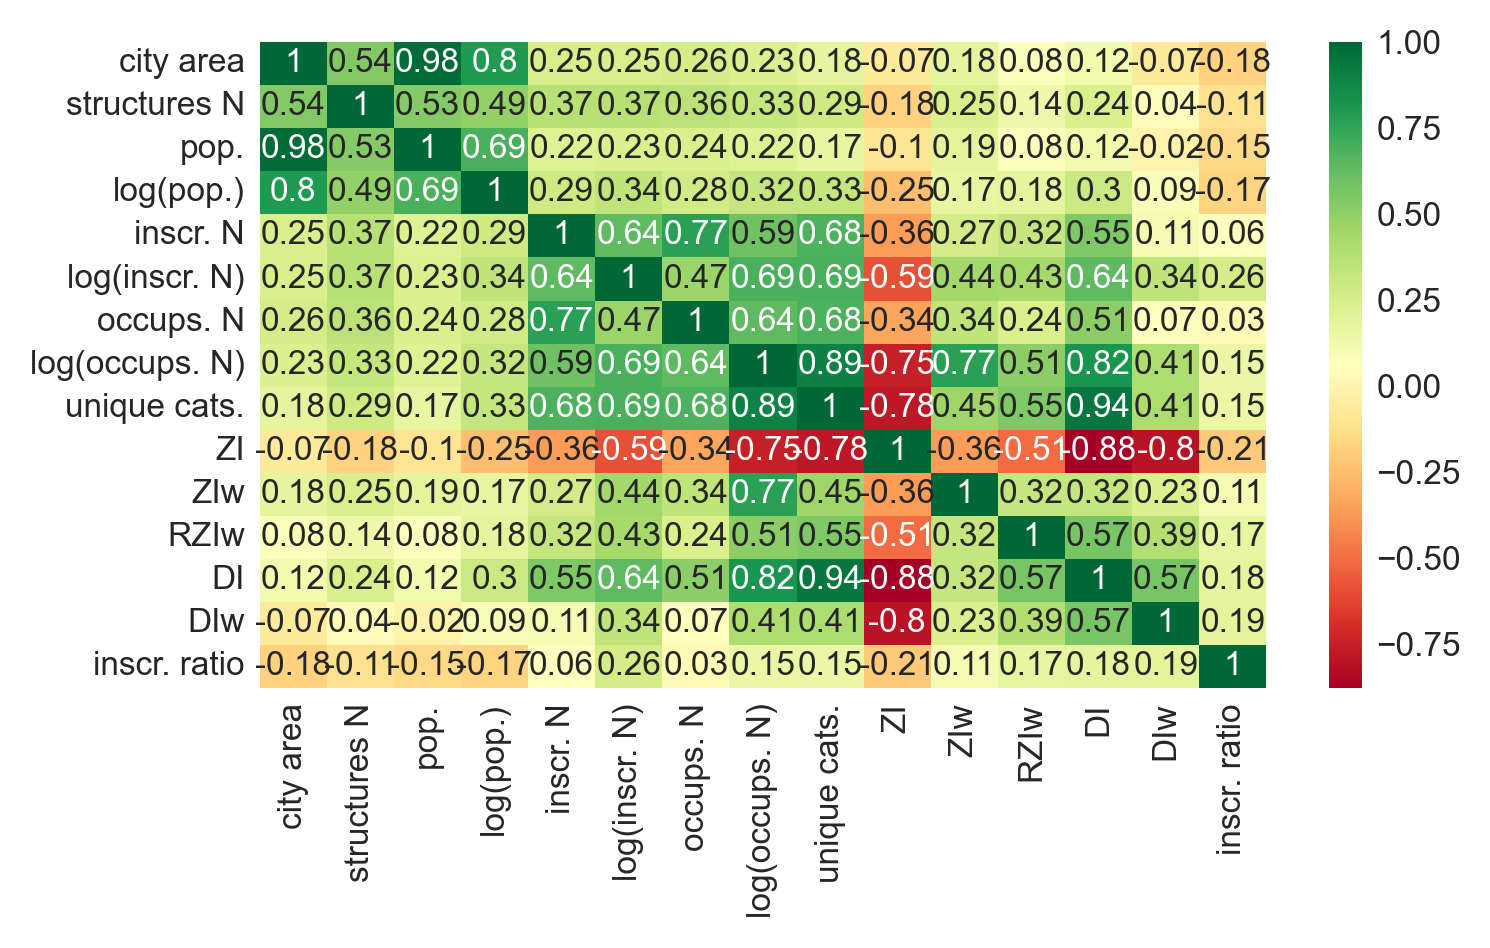

In [110]:
col_labels = ["city area", "structures N", "pop.", "log(pop.)", "inscr. N", "log(inscr. N)", "occups. N", "log(occups. N)", "unique cats.", "ZI", "ZIw", "RZIw", "DI", "DIw", "inscr. ratio"]
fig,ax=plt.subplots(figsize=(5.2,3.2), tight_layout=True)
sns.heatmap(corr_matrix, xticklabels=col_labels, yticklabels=col_labels, ax=ax, cmap="RdYlGn", annot=True)

In [111]:
def get_pvalue_matrix(df):
    df = df.dropna()._get_numeric_data()
    listlist_pvalues = []
    for r in df.columns:
        row_pvalues = []
        for c in df.columns:
            try:
                row_pvalues.append(round(pearsonr(df[r], df[c])[1], 2))
            except:
                row_pvalues.append(None)
        listlist_pvalues.append(row_pvalues)
    return pd.DataFrame(listlist_pvalues, columns=df.columns, index=df.columns)

In [112]:
pvalue_matrix = get_pvalue_matrix(roman_cities_wo_quant)
pvalue_matrix

,Area,num_of_structures,pop_est,pop_est_log,inscr_N,inscr_N_log,occups_N,occups_N_log,occups_cats_unique_N,ZI,ZIw,RZIw,DI,DIw,inscr_N_ratio
Area,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.23,0.00,0.18,0.04,0.23,0.00
num_of_structures,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.05,0.00,0.10,0.00,0.70,0.06
pop_est,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.03,0.43,0.00,0.36,0.18,0.21,0.01
pop_est_log,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.03,0.03,0.00,0.83,0.00
inscr_N,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.30
inscr_N_log,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
occups_N,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.49,0.64
occups_N_log,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
occups_cats_unique_N,0.00,0.00,0.03,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
ZI,0.23,0.05,0.43,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:>

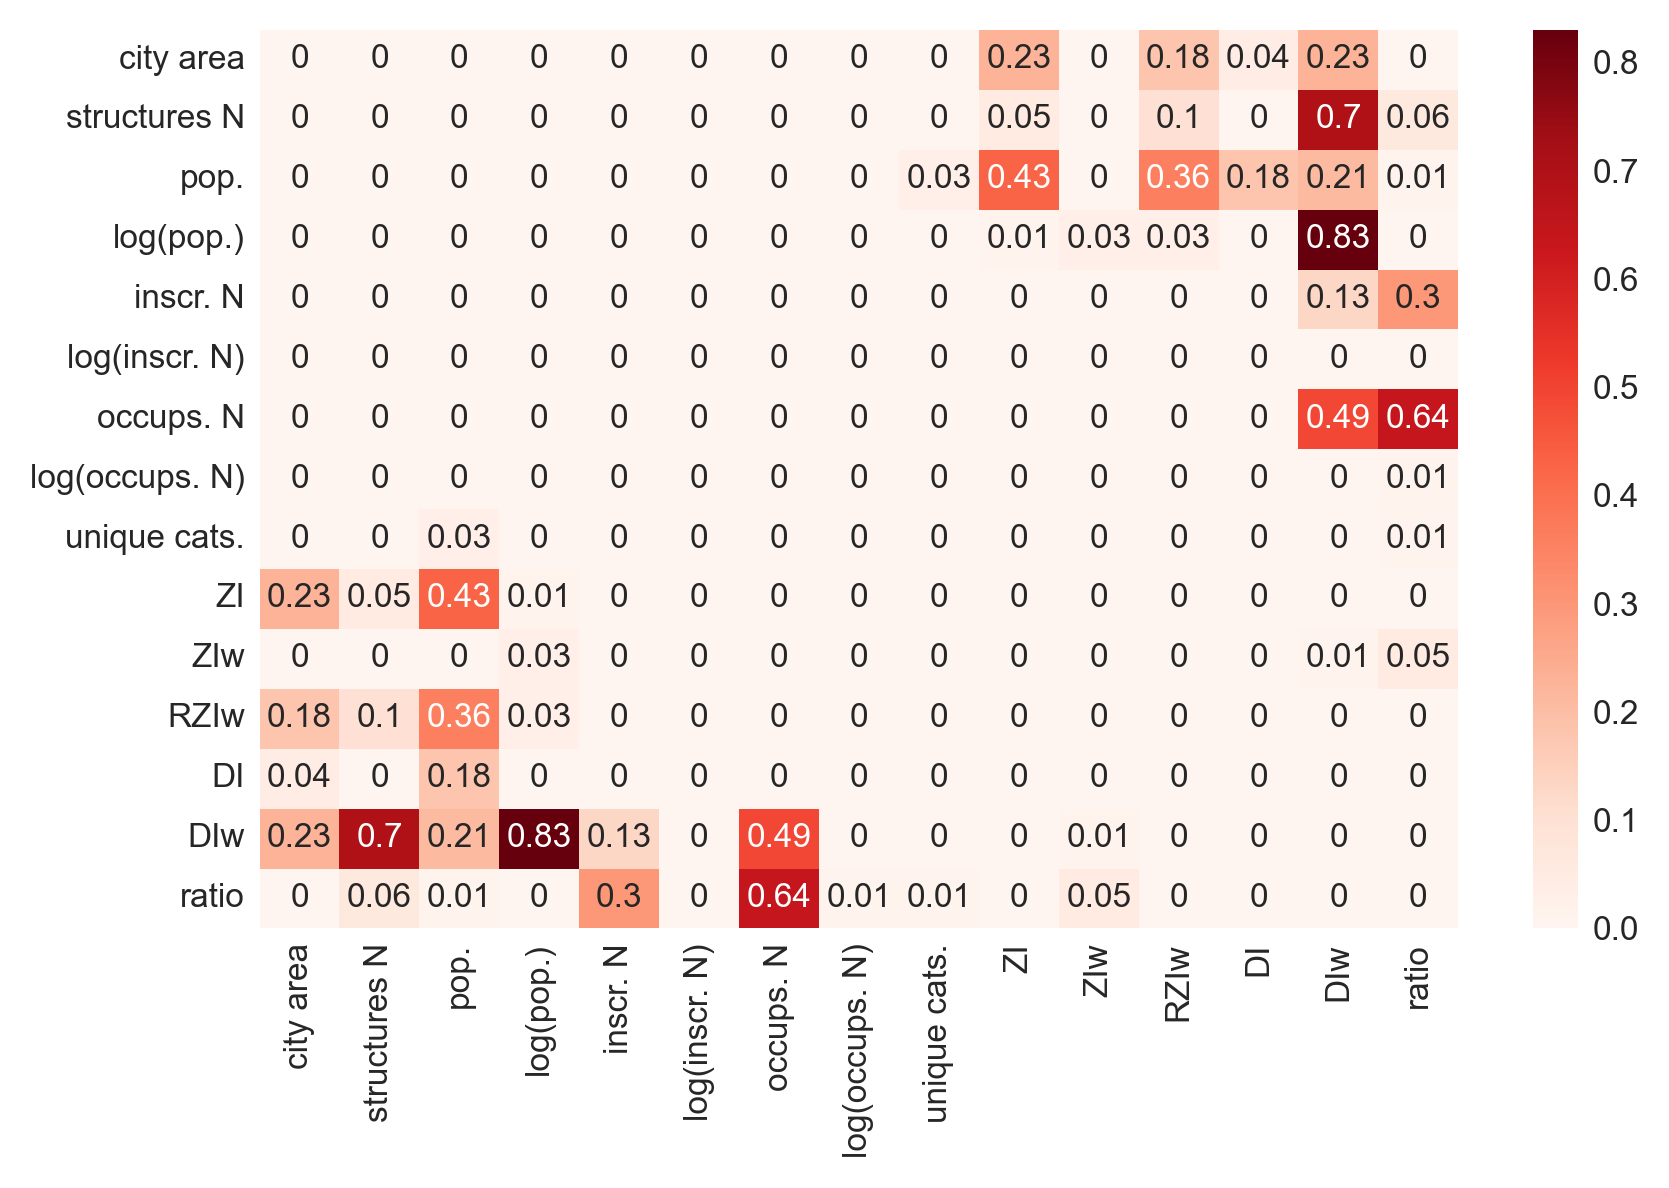

In [113]:
col_labels = ["city area", "structures N", "pop.", "log(pop.)", "inscr. N", "log(inscr. N)", "occups. N", "log(occups. N)", "unique cats.", "ZI", "ZIw", "RZIw", "DI", "DIw", "ratio"]
fig,ax=plt.subplots(tight_layout=True)
sns.heatmap(pvalue_matrix, xticklabels=col_labels, yticklabels=col_labels, ax=ax, cmap="Reds", annot=True)